In [1]:
import matplotlib.pyplot as plt
# import matplotlib_inline
import pandas as pd
import seaborn as sns
import warnings

%matplotlib inline
%precision 3

# matplotlib_inline.backend_inline.set_matplotlib_formats("pdf", "svg", quality=100)
plt.style.use("ggplot")
warnings.filterwarnings("ignore")

# Problem 1

A leading bank wants to develop a customer segmentation to give promotional offers to its customers. They collected a sample that summarizes the activities of users during the past few months. You are given the task to identify the segments based on credit card usage.

## 1.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

### Sample of the Bank Marketing Dataset.

In [2]:
bank_df = pd.read_csv("datasets/bank_marketing_part1_Data-1.csv")
bank_df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


### Checking the types of variables in the dataset.

In [3]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


### Descriptive Statistics of the dataset

In [4]:
bank_df.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


### Distribution of the spending variable.

In [5]:
def univariate_analysis(col):
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    sns.histplot(x=col, kde=True, ax=axs[0])
    sns.boxplot(x=col, orient="h", ax=axs[1])
    plt.suptitle(f"Distribution of {col.name} variable", size=15);

In [6]:
print(f"Skewness: {bank_df['spending'].skew():.4f}")

Skewness: 0.3999


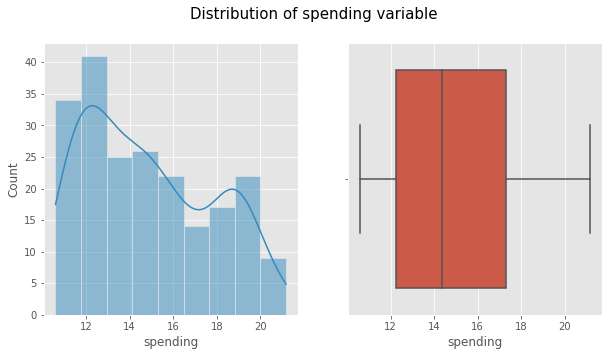

In [7]:
univariate_analysis(bank_df["spending"])
# plt.savefig('images/Figure1.svg')

### Distribution of the advance_payments variable.

In [8]:
print(f"Skewness: {bank_df['advance_payments'].skew():.4f}")

Skewness: 0.3866


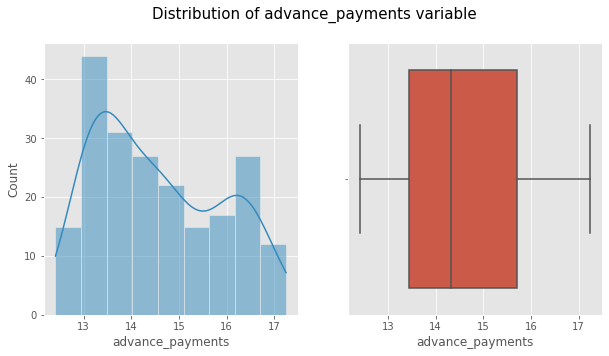

In [9]:
univariate_analysis(bank_df["advance_payments"])
# plt.savefig('images/Figure2.svg')

### Distribution of the probability_of_full_payment variable.

In [10]:
print(f"Skewness: {bank_df['probability_of_full_payment'].skew():.4f}")

Skewness: -0.5380


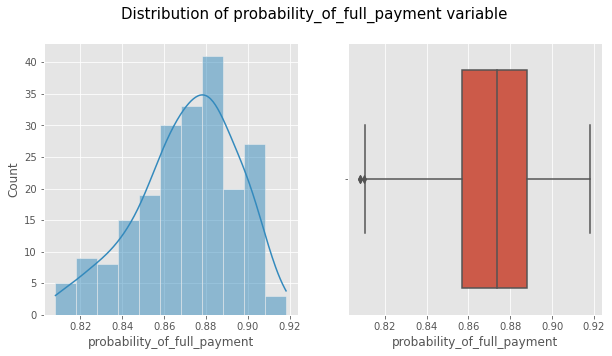

In [11]:
univariate_analysis(bank_df["probability_of_full_payment"])
# plt.savefig('images/Figure3.svg')

### Distribution of the current_balance variable.

In [12]:
print(f"Skewness: {bank_df['current_balance'].skew():.4f}")

Skewness: 0.5255


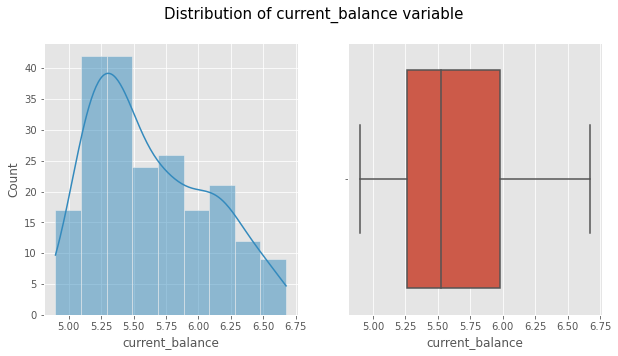

In [13]:
univariate_analysis(bank_df["current_balance"])
# plt.savefig('images/Figure4.svg')

### Distribution of the credit_limit variable.

In [14]:
print(f"Skewness: {bank_df['credit_limit'].skew():.4f}")

Skewness: 0.1344


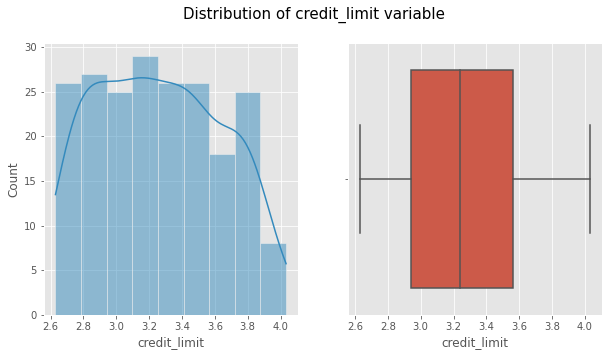

In [15]:
univariate_analysis(bank_df["credit_limit"])
# plt.savefig('images/Figure5.svg')

### Distribution of the min_payment_amt variable.

In [16]:
print(f"Skewness: {bank_df['min_payment_amt'].skew():.4f}")

Skewness: 0.4017


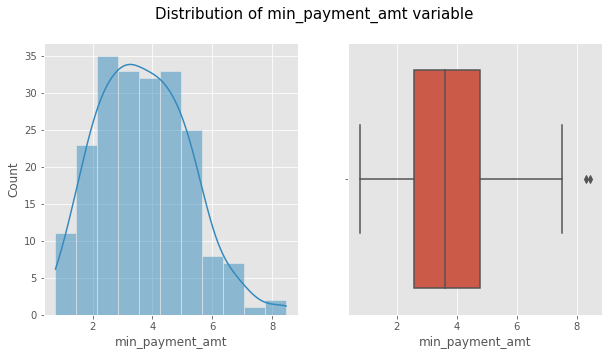

In [17]:
univariate_analysis(bank_df["min_payment_amt"])
# plt.savefig('images/Figure6.svg')

### Distribution of the max_spent_in_single_shopping variable.

In [18]:
print(f"Skewness: {bank_df['max_spent_in_single_shopping'].skew():.4f}")

Skewness: 0.5619


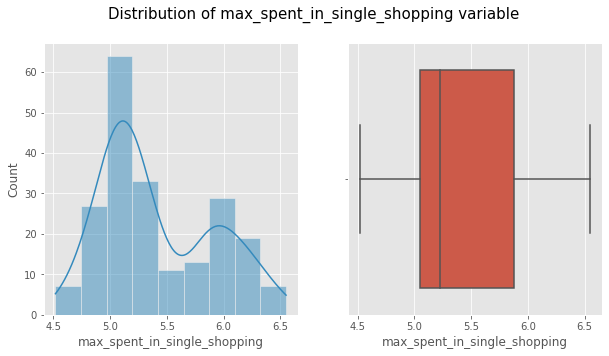

In [19]:
univariate_analysis(bank_df["max_spent_in_single_shopping"])
# plt.savefig('images/Figure7.svg')

### Correlation Heatmap of continuous variables.

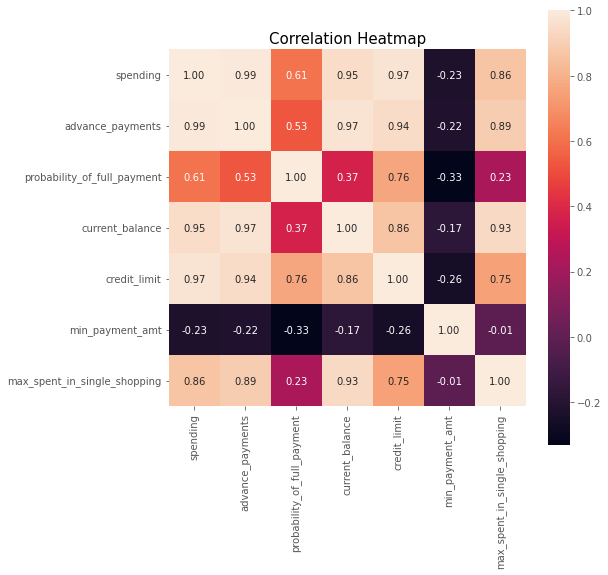

In [20]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(data=bank_df.corr(), fmt=".2f", annot=True, square=True, ax=ax)
plt.title("Correlation Heatmap", size=15);
# plt.savefig("images/Figure8.svg", bbox_inches="tight");

## 1.2  Do you think scaling is necessary for clustering in this case? Justify

In [21]:
bank_df.describe().loc[["mean", "std"], :]

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480


In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
bank_scaled = scaler.fit_transform(bank_df)
bank_df_scaled = pd.DataFrame(data=bank_scaled, columns=bank_df.columns)

In [23]:
bank_df_scaled.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107
3,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813


## 1.3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them.

In [24]:
from scipy.cluster.hierarchy import dendrogram, linkage

wardlink = linkage(bank_df_scaled, method="ward", metric="euclidean")

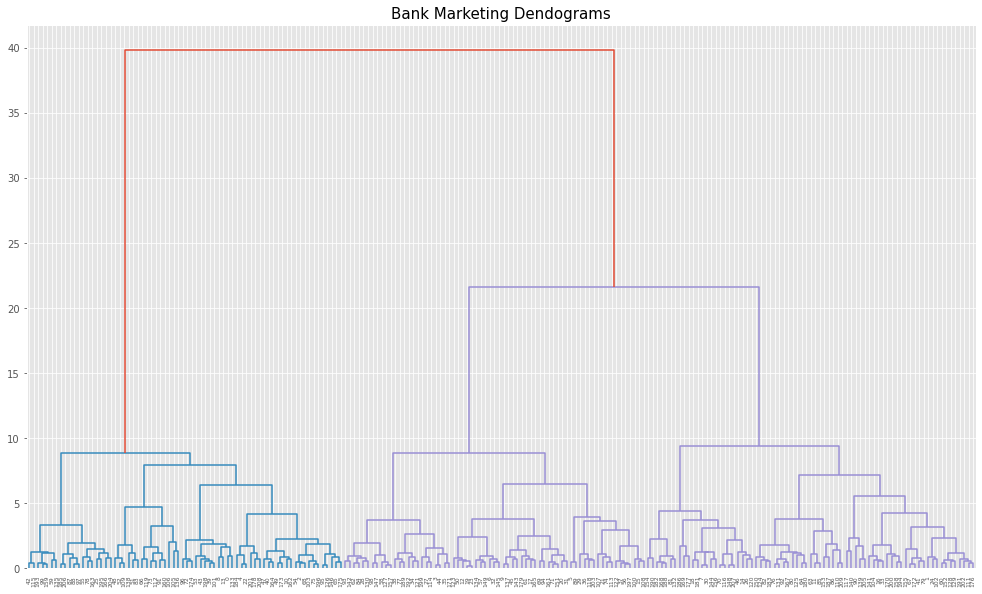

In [25]:
plt.figure(figsize=(17, 10))
Z = dendrogram(wardlink, leaf_font_size=6)
plt.title("Bank Marketing Dendograms", size=15);
# plt.savefig("images/Figure9.svg", bbox_inches="tight");

In [26]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity="euclidean", linkage="ward")
agg_cluster_no = cluster.fit_predict(bank_df_scaled)

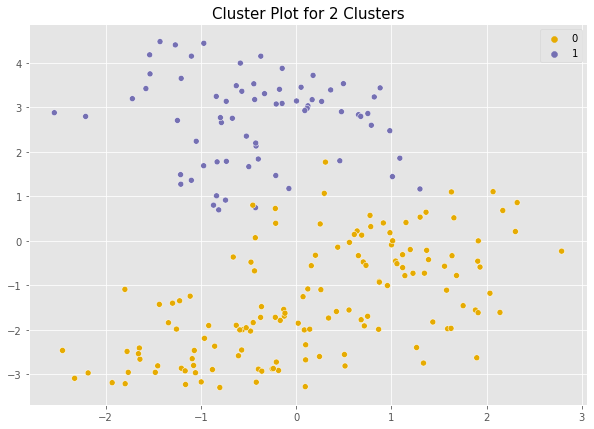

In [27]:
from sklearn.decomposition import PCA

pca_2 = PCA(2)
plot_columns = pca_2.fit_transform(bank_df_scaled)
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x=plot_columns[:, 1],
    y=plot_columns[:, 0],
    hue=agg_cluster_no,
    palette="Dark2_r",
    legend=True,
)
plt.title("Cluster Plot for 2 Clusters", size=15);
# plt.savefig("images/Figure10.svg", bbox_inches="tight");

## 1.4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score. Explain the results properly. Interpret and write inferences on the finalized clusters.

In [28]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

wss = []
ss = {1: 0}
for i in range(1, 11):
    KM = KMeans(n_clusters=i, random_state=0)
    KM.fit(bank_df_scaled)
    wss.append(KM.inertia_)
    if i > 1:
        y = KM.predict(bank_df_scaled)
        s = silhouette_score(bank_df_scaled, y, random_state=0)
        ss[i] = round(s, 5)
        print(f"The Average Silhouette Score for {i} clusters is {round(s, 5)}")

The Average Silhouette Score for 2 clusters is 0.46577
The Average Silhouette Score for 3 clusters is 0.40073
The Average Silhouette Score for 4 clusters is 0.3369
The Average Silhouette Score for 5 clusters is 0.28314
The Average Silhouette Score for 6 clusters is 0.29034
The Average Silhouette Score for 7 clusters is 0.26541
The Average Silhouette Score for 8 clusters is 0.25194
The Average Silhouette Score for 9 clusters is 0.25558
The Average Silhouette Score for 10 clusters is 0.25952


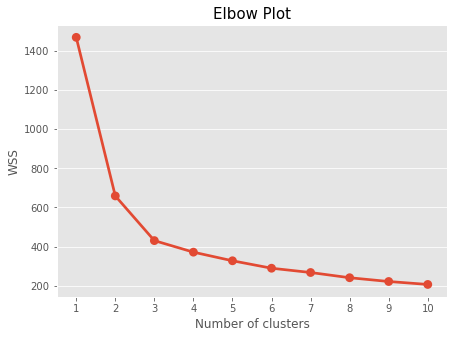

In [29]:
plt.figure(figsize=(7, 5))
sns.pointplot(x=list(range(1, 11)), y=wss)
plt.title("Elbow Plot", size=15)
plt.xlabel("Number of clusters")
plt.ylabel("WSS");
# plt.savefig("images/Figure11.svg", bbox_inches="tight");

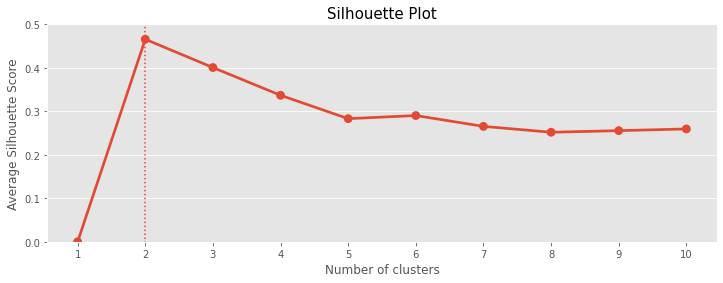

In [30]:
maxkey = [key for key, value in ss.items() if value == max(ss.values())][0]
fig, ax = plt.subplots(figsize=(12, 4))
sns.pointplot(x=list(ss.keys()), y=list(ss.values()))
plt.vlines(x=maxkey - 1, ymax=0, ymin=0.55, linestyles="dotted")
ax.set(ylim=(0, 0.5))
ax.set_title("Silhouette Plot", size=15)
ax.set_xlabel("Number of clusters")
ax.set_ylabel("Average Silhouette Score");
# plt.savefig("images/Figure12.svg", bbox_inches="tight");

In [31]:
KM_final = KMeans(n_clusters=3, random_state=0).fit(bank_df_scaled)
km_cluster_no = KM_final.labels_
bank_df["Cluster"] = km_cluster_no

In [32]:
bank_df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Cluster
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,2
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,0
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,2
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,1
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,2


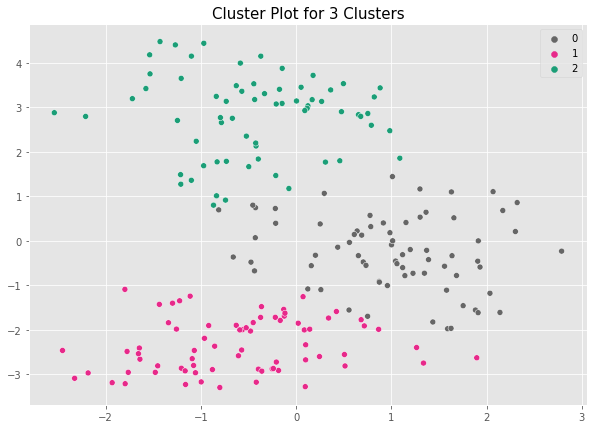

In [33]:
pca_2 = PCA(2)
plot_columns = pca_2.fit_transform(bank_df_scaled)
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x=plot_columns[:, 1],
    y=plot_columns[:, 0],
    hue=km_cluster_no,
    palette="Dark2_r",
    legend=True,
)
plt.title("Cluster Plot for 3 Clusters", size=15);
# plt.savefig("images/Figure13.svg", bbox_inches="tight");

## 1.5 Describe cluster profiles for the clusters defined. Recommend different promotional strategies for different clusters.

In [34]:
round(bank_df.groupby("Cluster").mean(), 3).T

Cluster,0,1,2
spending,14.438,11.857,18.495
advance_payments,14.338,13.248,16.203
probability_of_full_payment,0.882,0.848,0.884
current_balance,5.515,5.232,6.176
credit_limit,3.259,2.850,3.698
min_payment_amt,2.707,4.742,3.632
max_spent_in_single_shopping,5.121,5.102,6.042


# Problem 2: CART-RF-ANN

An Insurance firm providing tour insurance is facing higher claim frequency. The management decides to collect data from the past few years. We are assigned the task to make a model which predicts the claim status and provide recommendations to management. Models like CART, RF & ANN are used and the models' performances on train and test sets are compared.

## 2.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

### Sample of the Insurance Dataset.

In [35]:
insurance_df = pd.read_csv("datasets/insurance_part2_data-2.csv")
insurance_df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


### Checking the types of variables in the dataset.

In [36]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


### Descriptive Statistics

In [37]:
insurance_df.describe(include="all")

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
count,3000.000000,3000,3000,3000,3000.000000,3000,3000.000000,3000.000000,3000,3000
unique,NaN,4,2,2,NaN,2,NaN,NaN,5,3
top,NaN,EPX,Travel Agency,No,NaN,Online,NaN,NaN,Customised Plan,ASIA
freq,NaN,1365,1837,2076,NaN,2954,NaN,NaN,1136,2465
mean,38.091000,NaN,NaN,NaN,14.529203,NaN,70.001333,60.249913,NaN,NaN
std,10.463518,NaN,NaN,NaN,25.481455,NaN,134.053313,70.733954,NaN,NaN
min,8.000000,NaN,NaN,NaN,0.000000,NaN,-1.000000,0.000000,NaN,NaN
25%,32.000000,NaN,NaN,NaN,0.000000,NaN,11.000000,20.000000,NaN,NaN
50%,36.000000,NaN,NaN,NaN,4.630000,NaN,26.500000,33.000000,NaN,NaN
75%,42.000000,NaN,NaN,NaN,17.235000,NaN,63.000000,69.000000,NaN,NaN


### Distribution of the Age variable.

Skewness: 1.1497


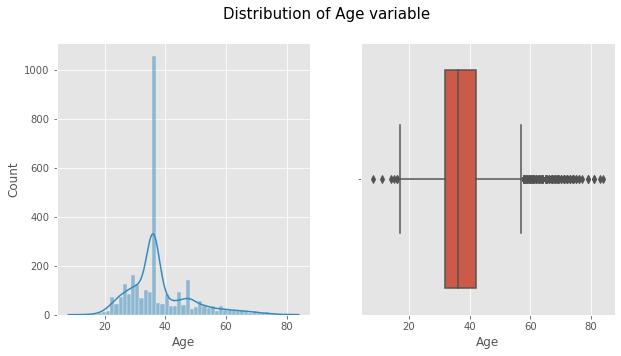

In [38]:
print(f"Skewness: {insurance_df['Age'].skew():.4f}")
univariate_analysis(insurance_df["Age"])
# plt.savefig("images/Figure14.svg", bbox_inches="tight");

### Distribution of the Agency_Code variable.

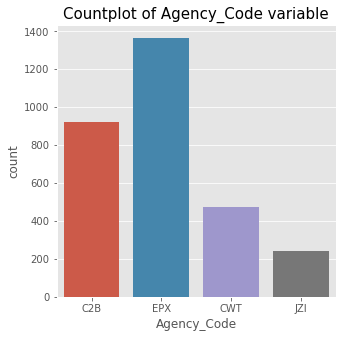

In [39]:
plt.figure(figsize=(5, 5))
sns.countplot(x=insurance_df["Agency_Code"])
plt.title("Countplot of Agency_Code variable", size=15);
# plt.savefig("images/Figure15.svg", bbox_inches="tight");

### Distribution of the Type variable.

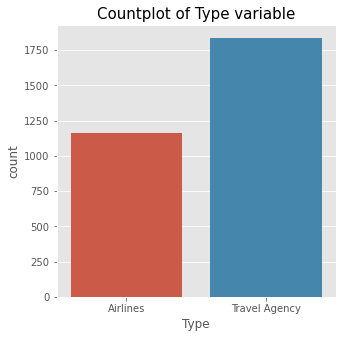

In [40]:
plt.figure(figsize=(5, 5))
sns.countplot(x=insurance_df["Type"])
plt.title("Countplot of Type variable", size=15);
# plt.savefig("images/Figure16.svg", bbox_inches="tight");

### Distribution of the Claimed variable.

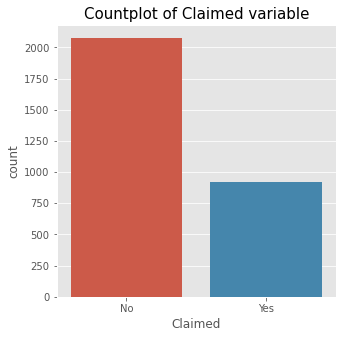

In [41]:
plt.figure(figsize=(5, 5))
sns.countplot(x=insurance_df["Claimed"])
plt.title("Countplot of Claimed variable", size=15);
# plt.savefig("images/Figure17.svg", bbox_inches="tight");

### Distribution of the Commision variable.

Skewness: 3.1489


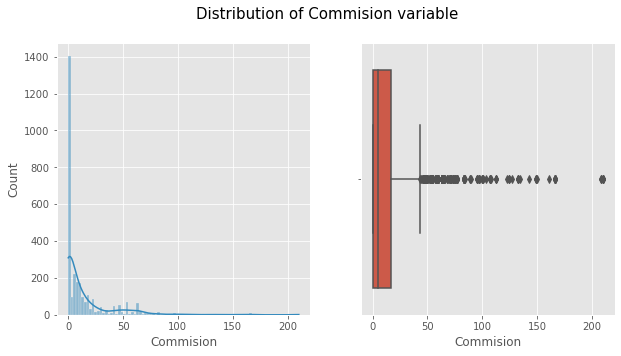

In [42]:
print(f"Skewness: {insurance_df['Commision'].skew():.4f}")
univariate_analysis(insurance_df["Commision"])
# plt.savefig("images/Figure18.svg", bbox_inches="tight");

### Distribution of the Channel variable.

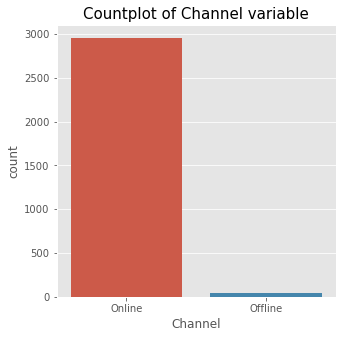

In [43]:
plt.figure(figsize=(5, 5))
sns.countplot(x=insurance_df["Channel"])
plt.title("Countplot of Channel variable", size=15);
# plt.savefig("images/Figure19.svg", bbox_inches="tight");

### Distribution of the Duration variable.

Skewness: 13.7847


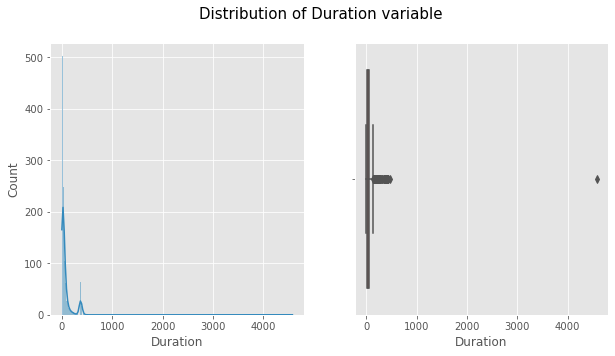

In [44]:
print(f"Skewness: {insurance_df['Duration'].skew():.4f}")
univariate_analysis(insurance_df["Duration"])
# plt.savefig("images/Figure20.svg", bbox_inches="tight");

### Distribution of the Sales variable.

Skewness: 2.3811


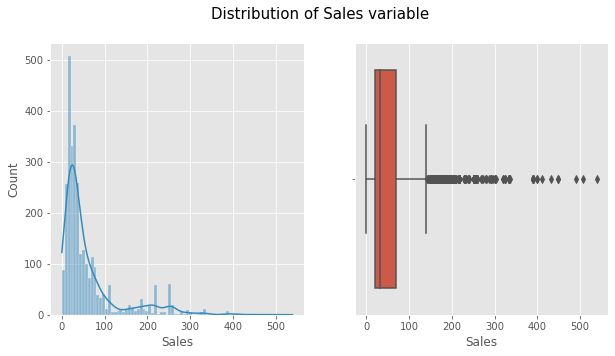

In [45]:
print(f"Skewness: {insurance_df['Sales'].skew():.4f}")
univariate_analysis(insurance_df["Sales"])
# plt.savefig("images/Figure21.svg", bbox_inches="tight");

### Distribution of the Product Name variable.

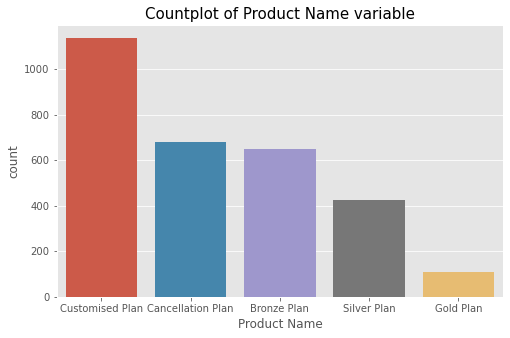

In [46]:
plt.figure(figsize=(8, 5))
sns.countplot(x=insurance_df["Product Name"])
plt.title("Countplot of Product Name variable", size=15);
# plt.savefig("images/Figure22.svg", bbox_inches="tight");

### Distribution of the Destination variable.

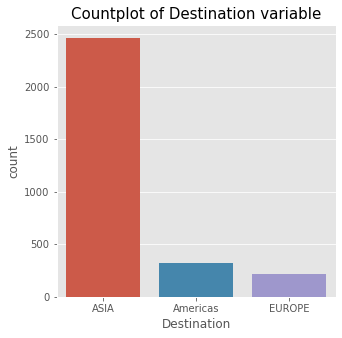

In [47]:
plt.figure(figsize=(5, 5))
sns.countplot(x=insurance_df["Destination"])
plt.title("Countplot of Destination variable", size=15);
# plt.savefig("images/Figure23.svg", bbox_inches="tight");

### Bivariate Analysis of Categorical variables with target variable.

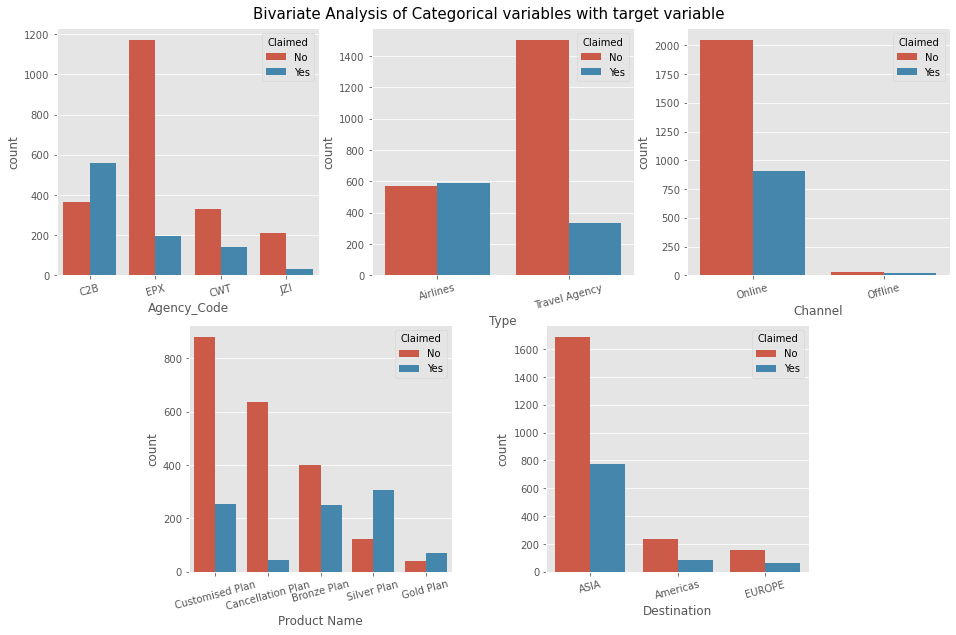

In [48]:
fig, axs = plt.subplots(2, 3, figsize=(16, 10), squeeze=True)
cat_plot = insurance_df.select_dtypes("object").drop("Claimed", axis=1).columns

sns.countplot(x=insurance_df[cat_plot[0]], hue=insurance_df["Claimed"], ax=axs[0, 0])
axs[0, 0].tick_params(axis="x", rotation=15)

sns.countplot(x=insurance_df[cat_plot[1]], hue=insurance_df["Claimed"], ax=axs[0, 1])
axs[0, 1].tick_params(axis="x", rotation=15)

sns.countplot(x=insurance_df[cat_plot[2]], hue=insurance_df["Claimed"], ax=axs[0, 2])
axs[0, 2].tick_params(axis="x", rotation=15)

sns.countplot(x=insurance_df[cat_plot[3]], hue=insurance_df["Claimed"], ax=axs[1, 0])
axs[1, 0].tick_params(axis="x", rotation=15)
axs[1, 0].set_position([0.24, 0.125, 0.228, 0.343])

sns.countplot(x=insurance_df[cat_plot[4]], hue=insurance_df["Claimed"], ax=axs[1, 1])
axs[1, 1].tick_params(axis="x", rotation=15)
axs[1, 1].set_position([0.55, 0.125, 0.228, 0.343])

axs[1, 2].set_visible(False)
plt.suptitle(
    "Bivariate Analysis of Categorical variables with target variable", size=15, y=0.91
);
# plt.savefig("images/Figure24.svg", bbox_inches="tight");

### Bivariate Analysis of Continuous variables.

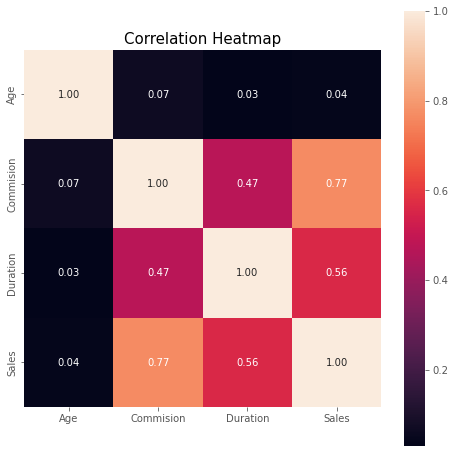

In [49]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(data=insurance_df.corr(), fmt=".2f", annot=True, square=True, ax=ax)
plt.title("Correlation Heatmap", size=15);
# plt.savefig("images/Figure25.svg", bbox_inches="tight");

## 2.2 Data Split: Split the data into test and train, build classification model CART, Random Forest, Artificial Neural Network

In [50]:
num_var = insurance_df.select_dtypes("number").columns
obj_var = insurance_df.select_dtypes("object").columns

### Converting Object variables to Categorical variables.

In [51]:
for col in obj_var:
    insurance_df[col] = pd.Categorical(insurance_df[col]).codes

### Splitting the data into train and test sets.

In [52]:
X = insurance_df.drop("Claimed", axis=1)
y = insurance_df.pop("Claimed")

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0, stratify=y
)

### Scaling the continuous variables

In [54]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [55]:
X_train = pd.DataFrame(data=X_train, columns=X.columns)
X_test = pd.DataFrame(data=X_test, columns=X.columns)

In [56]:
X_train.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,-1.786195,-1.287365,-1.239448,-0.356793,0.133922,-0.208457,-0.522459,1.840389,-0.442595
1,0.072811,0.721901,0.806811,-0.587070,0.133922,-0.345415,-0.687749,-0.525343,-0.442595
2,-0.206040,0.721901,0.806811,-0.587070,0.133922,-0.222153,-0.029332,0.263235,-0.442595
3,2.117717,-1.287365,-1.239448,0.260857,0.133922,0.010676,0.361603,1.840389,-0.442595
4,0.909364,-1.287365,-1.239448,-0.557567,0.133922,0.599597,-0.814494,0.263235,-0.442595


### CART Model

In [57]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [58]:
param_grid = {
    "max_depth": [2, 3, 4, 5, 6],
    "min_samples_leaf": [7, 8, 9, 10, 11],
    "min_samples_split": [25],
}

In [59]:
cart_grid_cv = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=0),
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
)
cart_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6],
                         'min_samples_leaf': [7, 8, 9, 10, 11],
                         'min_samples_split': [25]})

In [60]:
cart_grid_cv.best_params_

{'max_depth': 4, 'min_samples_leaf': 9, 'min_samples_split': 25}

In [61]:
cart_model = cart_grid_cv.best_estimator_

In [62]:
pd.DataFrame(
    cart_model.feature_importances_, columns=["Imp"], index=X_train.columns
).sort_values(by="Imp", ascending=False)

,Imp
Agency_Code,0.572302
Sales,0.231088
Product Name,0.095234
Commision,0.058411
Duration,0.042965
Age,0.000000
Type,0.000000
Channel,0.000000
Destination,0.000000


### Random Forest Model

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
param_grid = {
    "n_estimators": [91, 101, 111],
    "max_depth": [6, 7, 8],
    "min_samples_leaf": [20, 30, 40],
    "min_samples_split": [60, 90, 120],
    "max_features": [2, 3, 4],
}

In [65]:
rf_grid_cv = GridSearchCV(
    estimator=RandomForestClassifier(random_state=0, n_jobs=-1),
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
)
rf_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [6, 7, 8], 'max_features': [2, 3, 4],
                         'min_samples_leaf': [20, 30, 40],
                         'min_samples_split': [60, 90, 120],
                         'n_estimators': [91, 101, 111]})

In [66]:
rf_grid_cv.best_params_

{'max_depth': 7,
 'max_features': 3,
 'min_samples_leaf': 30,
 'min_samples_split': 90,
 'n_estimators': 101}

In [67]:
rf_model = rf_grid_cv.best_estimator_

In [68]:
pd.DataFrame(
    rf_model.feature_importances_, columns=["Imp"], index=X_train.columns
).sort_values(by="Imp", ascending=False)

,Imp
Agency_Code,0.331945
Product Name,0.199437
Commision,0.155153
Sales,0.150917
Duration,0.068495
Type,0.052348
Age,0.029196
Destination,0.012509
Channel,0.000000


### ANN Model

In [69]:
from sklearn.neural_network import MLPClassifier

In [70]:
param_grid = {
    "hidden_layer_sizes": [300, 400, 500],
    "max_iter": [300, 400, 500],
    "tol": [0.0001, 0.0003, 0.001],
}

In [71]:
ann_grid_cv = GridSearchCV(
    estimator=MLPClassifier(random_state=0), param_grid=param_grid, cv=5, n_jobs=-1,
)
ann_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=MLPClassifier(random_state=0), n_jobs=-1,
             param_grid={'hidden_layer_sizes': [300, 400, 500],
                         'max_iter': [300, 400, 500],
                         'tol': [0.0001, 0.0003, 0.001]})

In [72]:
ann_grid_cv.best_params_

{'hidden_layer_sizes': 400, 'max_iter': 300, 'tol': 0.000}

In [73]:
ann_model = ann_grid_cv.best_estimator_

## 2.3 Performance Metrics: Comment and Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score, classification reports for each model.

In [74]:
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
    roc_auc_score,
    roc_curve,
)

### Performance Metrics for CART Model.

#### Accuracy Score for Training and Testing

In [75]:
print(
    f"Training Accuracy score for the CART model: {accuracy_score(y_train, cart_model.predict(X_train)):.3f}"
)

Training Accuracy score for the CART model: 0.797


In [76]:
print(
    f"Testing Accuracy score for the CART model: {accuracy_score(y_test, cart_model.predict(X_test)):.3f}"
)

Testing Accuracy score for the CART model: 0.790


#### Confusion Matrix for Training and Testing

In [77]:
print("Confusion matrix of the train set for the CART model:")
print(f"{pd.DataFrame(confusion_matrix(y_train, cart_model.predict(X_train)))}")

Confusion matrix of the train set for the CART model:
      0    1
0  1260  193
1   234  413


In [78]:
print("Confusion matrix of the test set for the CART model:")
print(f"{pd.DataFrame(confusion_matrix(y_test, cart_model.predict(X_test)))}")

Confusion matrix of the test set for the CART model:
     0    1
0  544   79
1  110  167


#### ROC AUC Score and the ROC for Training and Testing

In [79]:
print(
    f"ROC AUC score of train data for the CART model: {roc_auc_score(y_train, cart_model.predict_proba(X_train)[:, 1]):.3f}"
)
print(
    f"ROC AUC score of test data for the CART model: {roc_auc_score(y_test, cart_model.predict_proba(X_test)[:, 1]):.3f}"
)

ROC AUC score of train data for the CART model: 0.836
ROC AUC score of test data for the CART model: 0.781


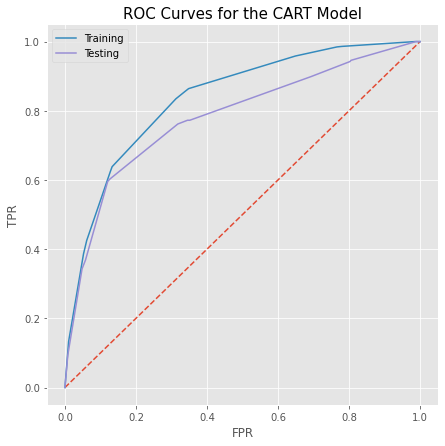

In [80]:
plt.figure(figsize=(7, 7))
fpr_train, tpr_train, _ = roc_curve(y_train, cart_model.predict_proba(X_train)[:, 1])
fpr_test, tpr_test, _ = roc_curve(y_test, cart_model.predict_proba(X_test)[:, 1])
plt.plot([0, 1], [0, 1], linestyle="--")
plt.plot(fpr_train, tpr_train, label="Training")
plt.plot(fpr_test, tpr_test, label="Testing")
plt.legend()
plt.title("ROC Curves for the CART Model", size=15)
plt.xlabel("FPR")
plt.ylabel("TPR");
# plt.savefig("images/Figure26.svg", bbox_inches="tight");

#### Classification Reports for Training and Testing

In [81]:
print("Classification report of the train data for the CART model:")
print(classification_report(y_train, cart_model.predict(X_train)))

Classification report of the train data for the CART model:
              precision    recall  f1-score   support

           0       0.84      0.87      0.86      1453
           1       0.68      0.64      0.66       647

    accuracy                           0.80      2100
   macro avg       0.76      0.75      0.76      2100
weighted avg       0.79      0.80      0.79      2100



In [82]:
print("Classification report of the test data for the CART model:")
print(classification_report(y_test, cart_model.predict(X_test)))

Classification report of the test data for the CART model:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       623
           1       0.68      0.60      0.64       277

    accuracy                           0.79       900
   macro avg       0.76      0.74      0.75       900
weighted avg       0.78      0.79      0.79       900



### Performance Metrics for Random Forest Model.

#### Accuracy Score for Training and Testing

In [83]:
print(
    f"Training Accuracy score for the Random Forest model: {accuracy_score(y_train, rf_model.predict(X_train)):.3f}"
)

Training Accuracy score for the Random Forest model: 0.794


In [84]:
print(
    f"Testing Accuracy score for the Random Forest model: {accuracy_score(y_test, rf_model.predict(X_test)):.3f}"
)

Testing Accuracy score for the Random Forest model: 0.782


#### Confusion Matrix for Training and Testing

In [85]:
print("Confusion matrix of the train set for the Random Forest model:")
print(f"{pd.DataFrame(confusion_matrix(y_train, rf_model.predict(X_train)))}")

Confusion matrix of the train set for the Random Forest model:
      0    1
0  1301  152
1   280  367


In [86]:
print("Confusion matrix of the test set for the Random Forest model:")
print(f"{pd.DataFrame(confusion_matrix(y_test, rf_model.predict(X_test)))}")

Confusion matrix of the test set for the Random Forest model:
     0    1
0  562   61
1  135  142


#### ROC AUC Score and the ROC for Training and Testing

In [87]:
print(
    f"ROC AUC score of train data for the Random Forest model: {roc_auc_score(y_train, rf_model.predict_proba(X_train)[:, 1]):.3f}"
)
print(
    f"ROC AUC score of test data for the Random Forest model: {roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1]):.3f}"
)

ROC AUC score of train data for the Random Forest model: 0.846
ROC AUC score of test data for the Random Forest model: 0.802


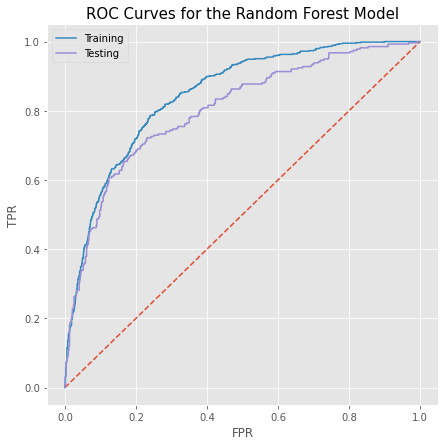

In [88]:
plt.figure(figsize=(7, 7))
fpr_train, tpr_train, _ = roc_curve(y_train, rf_model.predict_proba(X_train)[:, 1])
fpr_test, tpr_test, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])
plt.plot([0, 1], [0, 1], linestyle="--")
plt.plot(fpr_train, tpr_train, label="Training")
plt.plot(fpr_test, tpr_test, label="Testing")
plt.legend()
plt.title("ROC Curves for the Random Forest Model", size=15)
plt.xlabel("FPR")
plt.ylabel("TPR");
# plt.savefig("images/Figure27.svg", bbox_inches="tight");

#### Classification Reports for Training and Testing

In [89]:
print("Classification report of the train data for the Random Forest model:")
print(classification_report(y_train, rf_model.predict(X_train)))

Classification report of the train data for the Random Forest model:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1453
           1       0.71      0.57      0.63       647

    accuracy                           0.79      2100
   macro avg       0.77      0.73      0.74      2100
weighted avg       0.79      0.79      0.79      2100



In [90]:
print("Classification report of the test data for the Random Forest model:")
print(classification_report(y_test, rf_model.predict(X_test)))

Classification report of the test data for the Random Forest model:
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       623
           1       0.70      0.51      0.59       277

    accuracy                           0.78       900
   macro avg       0.75      0.71      0.72       900
weighted avg       0.77      0.78      0.77       900



### Performance Metrics for ANN Model.

#### Accuracy Score for Training and Testing

In [91]:
print(
    f"Training Accuracy score for the ANN model: {accuracy_score(y_train, ann_model.predict(X_train)):.3f}"
)

Training Accuracy score for the ANN model: 0.812


In [92]:
print(
    f"Testing Accuracy score for the ANN model: {accuracy_score(y_test, ann_model.predict(X_test)):.3f}"
)

Testing Accuracy score for the ANN model: 0.773


#### Confusion Matrix for Training and Testing

In [93]:
print("Confusion matrix of the train set for the ANN model:")
print(f"{pd.DataFrame(confusion_matrix(y_train, ann_model.predict(X_train)))}")

Confusion matrix of the train set for the ANN model:
      0    1
0  1291  162
1   233  414


In [94]:
print("Confusion matrix of the test set for the ANN model:")
print(f"{pd.DataFrame(confusion_matrix(y_test, ann_model.predict(X_test)))}")

Confusion matrix of the test set for the ANN model:
     0    1
0  555   68
1  136  141


#### ROC AUC Score and the ROC for Training and Testing

In [95]:
print(
    f"ROC AUC score of train data for the ANN model: {roc_auc_score(y_train, ann_model.predict_proba(X_train)[:, 1]):.3f}"
)
print(
    f"ROC AUC score of test data for the ANN model: {roc_auc_score(y_test, ann_model.predict_proba(X_test)[:, 1]):.3f}"
)

ROC AUC score of train data for the ANN model: 0.869
ROC AUC score of test data for the ANN model: 0.797


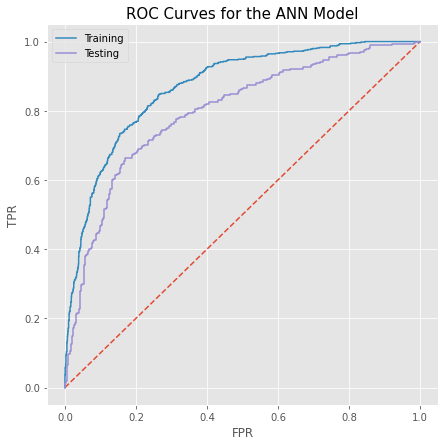

In [96]:
plt.figure(figsize=(7, 7))
fpr_train, tpr_train, _ = roc_curve(y_train, ann_model.predict_proba(X_train)[:, 1])
fpr_test, tpr_test, _ = roc_curve(y_test, ann_model.predict_proba(X_test)[:, 1])
plt.plot([0, 1], [0, 1], linestyle="--")
plt.plot(fpr_train, tpr_train, label="Training")
plt.plot(fpr_test, tpr_test, label="Testing")
plt.legend()
plt.title("ROC Curves for the ANN Model", size=15)
plt.xlabel("FPR")
plt.ylabel("TPR");
# plt.savefig("images/Figure28.svg", bbox_inches="tight");

#### Classification Reports for Training and Testing

In [97]:
print("Classification report of the train data for the ANN model:")
print(classification_report(y_train, ann_model.predict(X_train)))

Classification report of the train data for the ANN model:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1453
           1       0.72      0.64      0.68       647

    accuracy                           0.81      2100
   macro avg       0.78      0.76      0.77      2100
weighted avg       0.81      0.81      0.81      2100



In [98]:
print("Classification report of the test data for the ANN model:")
print(classification_report(y_test, ann_model.predict(X_test)))

Classification report of the test data for the ANN model:
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       623
           1       0.67      0.51      0.58       277

    accuracy                           0.77       900
   macro avg       0.74      0.70      0.71       900
weighted avg       0.76      0.77      0.76       900



## 2.4 Final Model: Compare all the models and write an inference which model is best/optimized.

In [99]:
train_accuracies = []
train_precisions = []
train_recalls = []
train_f1_scores = []
train_auc = []
models = [cart_model, rf_model, ann_model]

for model in models:
    train_accuracies.append(accuracy_score(y_train, model.predict(X_train)))
    train_precisions.append(precision_score(y_train, model.predict(X_train)))
    train_recalls.append(recall_score(y_train, model.predict(X_train)))
    train_f1_scores.append(f1_score(y_train, model.predict(X_train)))
    train_auc.append(roc_auc_score(y_train, model.predict_proba(X_train)[:, 1]))

In [100]:
test_accuracies = []
test_precisions = []
test_recalls = []
test_f1_scores = []
test_auc = []
models = [cart_model, rf_model, ann_model]

for model in models:
    test_accuracies.append(accuracy_score(y_test, model.predict(X_test)))
    test_precisions.append(precision_score(y_test, model.predict(X_test)))
    test_recalls.append(recall_score(y_test, model.predict(X_test)))
    test_f1_scores.append(f1_score(y_test, model.predict(X_test)))
    test_auc.append(roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

In [101]:
train_metrics = pd.DataFrame(
    data={
        "Accuracy": train_accuracies,
        "Precision": train_precisions,
        "Recall": train_recalls,
        "F1-score": train_f1_scores,
        "AUC-score": train_auc,
    },
    index=["CART Model", "Random Forest Model", "ANN Model"],
)
round(train_metrics.head(), 3)

,Accuracy,Precision,Recall,F1-score,AUC-score
CART Model,0.797,0.682,0.638,0.659,0.836
Random Forest Model,0.794,0.707,0.567,0.630,0.846
ANN Model,0.812,0.719,0.640,0.677,0.869


In [102]:
test_metrics = pd.DataFrame(
    data={
        "Accuracy": test_accuracies,
        "Precision": test_precisions,
        "Recall": test_recalls,
        "F1-score": test_f1_scores,
        "AUC-score": test_auc,
    },
    index=["CART Model", "Random Forest Model", "ANN Model"],
)
round(test_metrics.head(), 3)

,Accuracy,Precision,Recall,F1-score,AUC-score
CART Model,0.790,0.679,0.603,0.639,0.781
Random Forest Model,0.782,0.700,0.513,0.592,0.802
ANN Model,0.773,0.675,0.509,0.580,0.797
